In [15]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [17]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Target variable (rating) description

In [18]:
df['rating'].describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

The ratings are based on a scale from 0-5. However, the distribution seems heavily skewed. Half of the ratings are 4.375 or greater. To get rid of the skew, I will create a binary classifier. Ratings below 4.375 will be classified as low. Rating 4.375 or greater will be classified as high.

In [19]:
df['rating_class'] = np.where(df['rating']>=4.375, 'high', 'low')
df[['rating', 'rating_class']].head()

,rating,rating_class
0,2.500,low
1,4.375,high
2,3.750,low
3,5.000,high
4,3.125,low


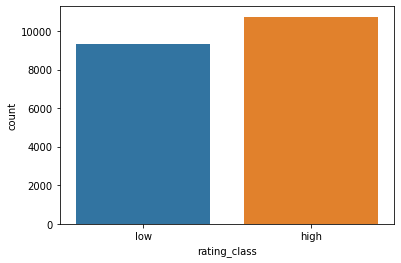

In [20]:
sns.countplot(df['rating_class'])
plt.show()

Now the ratings are much more balanced.

#### Let's check for missing values

In [21]:
missing_data = df.isnull().sum()/df.isnull().count()
missing_data.sort_values(ascending=False).head()

fat             0.208608
protein         0.207560
sodium          0.205416
calories        0.205316
rating_class    0.000000
dtype: float64

Only the nutritional information has missing values. I will drop these columns from our model.
#### Now let's see what other features are most correlated with our target variable.

In [22]:
print(df.corr()['rating'].sort_values(ascending=False).head(20), df.corr()['rating'].sort_values(ascending=False).tail(20))

rating            1.000000
bon appétit       0.124549
peanut free       0.096087
soy free          0.092965
tree nut free     0.081347
bake              0.076978
roast             0.073499
fall              0.067343
sauté             0.066553
dinner            0.060957
kosher            0.059071
winter            0.055126
pescatarian       0.054034
thanksgiving      0.052990
onion             0.049997
grill/barbecue    0.048081
high fiber        0.047827
gourmet           0.047354
no sugar added    0.047197
tomato            0.046579
Name: rating, dtype: float64 lime juice       -0.055399
chartreuse       -0.059753
weelicious       -0.060289
créme de cacao   -0.061670
pernod           -0.062768
fortified wine   -0.063814
brandy           -0.065481
condiment        -0.076295
non-alcoholic    -0.077476
rum              -0.084689
liqueur          -0.090757
harpercollins    -0.105094
bitters          -0.137368
cocktail party   -0.140482
cocktail         -0.140723
spirit           -0.146625

In [23]:
possible_features = ['bon appétit', 'peanut free', 'soy free', 'tree nut free', 'bake', 'roast', 'fall', 'sauté',
                     'dinner', 'kosher', 'winter', 'pescatarian', 'thanksgiving', 'onion', 'grill/barbecue',
                     'high fiber', 'gourmet', 'no sugar added', 'lime juice', 'chartreuse', 'weelicious',
                     'créme de cacao', 'pernod', 'fortified wine', 'brandy', 'condiment', 'non-alcoholic', 'rum',
                     'liqueur', 'harpercollins', 'bitters', 'cocktail party', 'cocktail', 'spirit', 'gin',
                     'house & garden', 'alcoholic', 'drink']

# Let's see if the possible features are correlated with each other before adding them to our model.

for col in df[possible_features].corr().columns:
    high_corr = np.where(np.abs(df[possible_features].corr()[col]) > .65, df[possible_features].corr().index, 'Not_Strong_corr')
    print('{} is highly correlated with: {}'.format(col, high_corr[high_corr == df[possible_features].corr().index]))

bon appétit is highly correlated with: ['bon appétit' 'gourmet']
peanut free is highly correlated with: ['peanut free' 'soy free' 'tree nut free' 'kosher' 'pescatarian']
soy free is highly correlated with: ['peanut free' 'soy free' 'tree nut free' 'kosher' 'pescatarian']
tree nut free is highly correlated with: ['peanut free' 'soy free' 'tree nut free']
bake is highly correlated with: ['bake']
roast is highly correlated with: ['roast']
fall is highly correlated with: ['fall']
sauté is highly correlated with: ['sauté']
dinner is highly correlated with: ['dinner']
kosher is highly correlated with: ['peanut free' 'soy free' 'kosher' 'pescatarian']
winter is highly correlated with: ['winter']
pescatarian is highly correlated with: ['peanut free' 'soy free' 'kosher' 'pescatarian']
thanksgiving is highly correlated with: ['thanksgiving']
onion is highly correlated with: ['onion']
grill/barbecue is highly correlated with: ['grill/barbecue']
high fiber is highly correlated with: ['high fiber']

Because of intercorrelation I will drop [gourmet, soy free, tree nut tree, kosher, pescatarian, and alcoholic] from my feature set.

In [24]:
features = ['bon appétit', 'peanut free', 'bake', 'roast', 'fall', 'sauté',
            'dinner', 'winter', 'thanksgiving', 'onion', 'grill/barbecue',
            'high fiber', 'no sugar added', 'lime juice', 'chartreuse', 'weelicious',
            'créme de cacao', 'pernod', 'fortified wine', 'brandy', 'condiment', 'non-alcoholic', 'rum',
            'liqueur', 'harpercollins', 'bitters', 'cocktail party', 'cocktail', 'spirit', 'gin',
            'house & garden', 'drink']

In [ ]:
from sklearn.svm import SVC

X = df[features]
Y = df['rating_class']

svm = SVC() 
svm.fit(X,Y)
svm.score(X,Y)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
